In [1]:
import pandas as pd
import numpy as np
import xlrd

In [168]:
data = pd.read_excel("../Dataset/breast_preprocessed.xls",header=None)
# data.append(xlrd.open_workbook("../Dataset/breast_preprocessed.xls"))

In [109]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
47290,pheA,5.705,5.6142,5.6955,5.6227,5.6727,5.5995,5.633,5.6539,5.6511,...,5.6595,5.6292,5.6042,5.6266,5.6022,5.6709,5.6136,5.6038,5.6693,5.5818
47291,thrB,5.7077,5.7586,5.7279,5.6777,5.6761,5.7091,5.6777,5.68,5.6763,...,5.6918,5.6501,5.5772,5.6637,5.6556,5.6587,5.6987,5.6933,5.6775,5.68
47292,trpF,5.6684,5.6585,5.6337,5.6427,5.6371,5.6691,5.62,5.6199,5.6608,...,5.6392,5.6451,5.6149,5.551,5.605,5.6246,5.5404,5.6206,5.6552,5.6141
47293,y,luminal,luminal,luminal,luminal,luminal,non-luminal,non-luminal,luminal,luminal,...,luminal,luminal,luminal,non-luminal,non-luminal,luminal,luminal,luminal,non-luminal,luminal
47294,NaN,1,1,1,1,1,2,2,1,1,...,1,1,1,2,2,1,1,1,2,1


In [169]:
data=data.replace(0,np.NaN)
data = data.drop_duplicates()
copy = data

In [13]:
# pip install xlwt required
data.to_excel(r'test.xls',header=False,index=False)

In [117]:
data = copy
for i in range(len(data.index)-2):
    mean = data.iloc[i,1:].mean()
    for j in range(1,len(data.columns)):
        data.at[data.index[i],j] = str(float(data.at[data.index[i],j]) - float(mean))

In [170]:
value_matrix = np.array(data.iloc[0:len(data.index)-2, 1:], dtype = np.float16).transpose()
value_matrix

array([[5.34 , 5.848, 6.707, ..., 5.703, 5.707, 5.668],
       [5.625, 5.875, 6.81 , ..., 5.613, 5.758, 5.66 ],
       [5.617, 5.8  , 6.7  , ..., 5.695, 5.727, 5.633],
       ...,
       [5.613, 5.805, 7.094, ..., 5.605, 5.69 , 5.62 ],
       [5.438, 5.984, 7.047, ..., 5.668, 5.676, 5.656],
       [5.54 , 5.85 , 6.918, ..., 5.582, 5.68 , 5.613]], dtype=float16)

In [147]:
dfM = []
for i in range(1,len(data.columns)):
    if data.at[data.index[47293],i] == 'luminal':
        dfM.append(1)
    else:
        dfM.append(0)
len(dfM)

128

In [166]:
print(data.iloc[47293,1:],dfM)

1          luminal
2          luminal
3          luminal
4          luminal
5          luminal
6      non-luminal
7      non-luminal
8          luminal
9          luminal
10         luminal
11         luminal
12         luminal
13         luminal
14         luminal
15         luminal
16         luminal
17         luminal
18         luminal
19         luminal
20     non-luminal
21     non-luminal
22     non-luminal
23     non-luminal
24         luminal
25         luminal
26         luminal
27     non-luminal
28     non-luminal
29         luminal
30     non-luminal
          ...     
99     non-luminal
100        luminal
101    non-luminal
102        luminal
103        luminal
104        luminal
105        luminal
106        luminal
107    non-luminal
108    non-luminal
109        luminal
110        luminal
111        luminal
112    non-luminal
113        luminal
114        luminal
115        luminal
116    non-luminal
117        luminal
118        luminal
119        luminal
120        l

In [185]:
from sklearn.model_selection import train_test_split
X = value_matrix
y = dfM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
len(X_train[0])

47293

In [186]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
len(X_test[0])

47293

In [210]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_test = lda.transform(X_test)
len(X_test)

26

In [212]:
lda = LDA(store_covariance=True)
#X_r2 = lda.fit_transform(X, y)
X_r2 = lda.fit(X, y).transform(X)
plt.figure()
colors = [ 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], dfM):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA for breast cancer')

plt.show()

KeyboardInterrupt: 

In [198]:
X_r2

array([[ 1.01738008],
       [ 0.39180469],
       [ 0.53560183],
       [ 1.30543617],
       [ 1.07894888],
       [-0.66786428],
       [-1.08828933],
       [ 0.4833784 ],
       [ 0.45157728],
       [ 0.83945047],
       [-0.79243718],
       [ 1.29612577],
       [ 1.37598539],
       [ 0.68448739],
       [ 0.30722953],
       [ 1.62794055],
       [ 0.46140701],
       [ 0.25951451],
       [-1.03351259],
       [-0.44472192],
       [-0.78962624],
       [-2.03334944],
       [ 0.27235312],
       [-0.03899702],
       [-1.08970363],
       [-0.64136104],
       [-1.01706127],
       [-2.0673094 ],
       [ 0.05718198],
       [ 1.54932789],
       [ 1.2072909 ],
       [ 1.4197083 ],
       [ 0.65636612],
       [-1.34715457],
       [ 0.80404095],
       [-1.58267368],
       [ 0.55070756],
       [-1.72114024],
       [ 0.61245821],
       [ 1.3211611 ],
       [-3.15058858],
       [ 0.59918656],
       [ 0.0378241 ],
       [-2.09138811],
       [ 0.89822628],
       [ 0

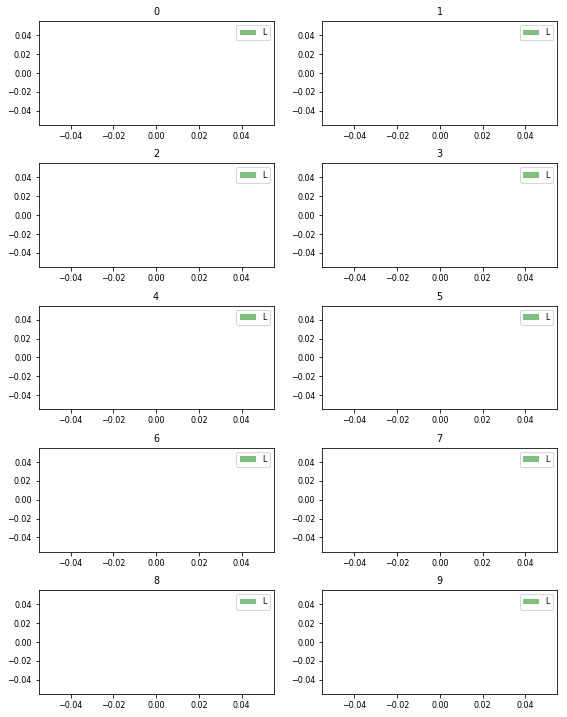

In [202]:
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth = max(value_matrix[idx]) - min(value_matrix[idx])
    ax.hist([dfM[idx]], bins=np.arange(min(value_matrix[idx]), max(value_matrix[idx]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['L','NL'],color=['g'])
    ax.legend(loc='upper right')
    ax.set_title(idx)
plt.tight_layout()
plt.show()

In [92]:
import pandas as pd
import numpy as np
from scipy.linalg import svd
from numpy.linalg import svd
import matplotlib.pylab as plt
from numpy import array
import os

file = "../Dataset/breast_preprocessed.xls"


def read_data():
    """
    read excel
    """
    data = pd.read_excel(file, header=None)
    # Taking the whole dataset ignoring the class labels
    X = np.array(data.iloc[0:len(data.index)-2, 1:], dtype = np.float64).transpose()

    return X, data.to_numpy().T


def mysvd(A):
    # get eigen values and eigen vectors from matrix
    S, U = np.linalg.eig(A.dot(A.T))
    # sigma is sqrt of eigen values
    S = np.diag(sorted(np.sqrt(S), reverse=True))
    return U, S


def mean_centered(A):
    """
    subtract mean from A matrix
    return: mean centered matrix
    """
    mean_vector = np.mean(X, axis = 0)
    A = A - mean_vector
    # for i in range(A.shape[0]):
    #     A[i,] = X[i] - mean_vector[i]

    return A


def calculateCovariance(X):
    lenX = X.shape[1]
    covariance = X.T.dot(X)/lenX-1
    return covariance


X, data = read_data()
X = mean_centered(X)

U, S = mysvd(X)
zeros = np.zeros((X.shape[0], X.shape[1]), dtype=np.float32)

XV = U.dot(S)
# U, s, VT = svd(X, full_matrices=False)

# cov_mat = np.cov(eig_vec)
# eig_vec = VT
# eig_val = S
# Make a list of (eigenvalue, eigenvector) tuples
# eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_vec))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
# eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# for i in eig_pairs:
#     print(i[0])

# Choosing k eigenvectors with the largest eigenvalues
# matrix_w = np.hstack((eig_pairs[0][1].reshape(128, 1), eig_pairs[1][1].reshape(128, 1)))
# print(matrix_w)

# Transforming the samples onto the new subspace
# transformed = matrix_w.T.dot(X)


In [124]:
X

array([[-0.25658672, -0.01024531, -0.19634687, ...,  0.0597125 ,
         0.02704219,  0.02114453],
       [ 0.02771328,  0.01795469, -0.09264687, ..., -0.0310875 ,
         0.07794219,  0.01124453],
       [ 0.01991328, -0.05364531, -0.20404687, ...,  0.0502125 ,
         0.04724219, -0.01355547],
       ...,
       [ 0.01691328, -0.05294531,  0.19245313, ..., -0.0414875 ,
         0.01264219, -0.02665547],
       [-0.16188672,  0.12735469,  0.14715313, ...,  0.0240125 ,
        -0.00315781,  0.00794453],
       [-0.06038672, -0.00474531,  0.01835313, ..., -0.0634875 ,
        -0.00065781, -0.03315547]])